In [ ]:
""" Import libraries """

import pandas as pd
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from spreadsheet_loader import load_spreadsheets_from_folder

In [ ]:
""" Load spreadsheets and create Pandas dataframe """

df = load_spreadsheets_from_folder()
print(df.head())
print(df.shape)

In [6]:
""" Select only relevant columns """

def select_columns_gui(df, max_button_width=15, max_window_height=500, min_button_padding=20):
    selected_cols = []

    def toggle_column(col_name):
        if col_name in selected_cols:
            selected_cols.remove(col_name)
            buttons[col_name].config(relief="raised", bg="SystemButtonFace")
        else:
            selected_cols.append(col_name)
            buttons[col_name].config(relief="sunken", bg="lightblue")

    def submit():
        root.quit()

    # --- Layout sizing logic ---
    column_names = list(df.columns)
    max_col_len = max(len(str(col)) for col in column_names)
    button_pixel_width = max_col_len * 7 + min_button_padding
    buttons_per_row = max(1, min(6, 1000 // button_pixel_width))  # max ~6 per row
    total_width = min(1000, buttons_per_row * button_pixel_width + 50)

    # --- Main window ---
    root = tk.Tk()
    root.title("Select Columns")
    root.geometry(f"{total_width}x{max_window_height}")

    # --- Outer layout: top (scrollable) + bottom (submit) ---
    outer_frame = tk.Frame(root)
    outer_frame.pack(fill="both", expand=True)

    # --- Canvas + Scrollbar setup ---
    canvas = tk.Canvas(outer_frame, width=total_width)
    scrollbar = ttk.Scrollbar(outer_frame, orient="vertical", command=canvas.yview)
    canvas.configure(yscrollcommand=scrollbar.set)

    scrollbar.pack(side="right", fill="y")
    canvas.pack(side="left", fill="both", expand=True)

    # --- Create scrollable frame ---
    scrollable_frame = tk.Frame(canvas)
    canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")

    # --- Ensure canvas resizes properly ---
    def update_scrollregion(event):
        canvas.configure(scrollregion=canvas.bbox("all"))
    scrollable_frame.bind("<Configure>", update_scrollregion)

    # --- Fill with buttons ---
    buttons = {}
    for i, col in enumerate(column_names):
        row = i // buttons_per_row
        col_pos = i % buttons_per_row
        btn = tk.Button(scrollable_frame, text=col, width=max_button_width, command=lambda c=col: toggle_column(c))
        btn.grid(row=row, column=col_pos, padx=5, pady=5)
        buttons[col] = btn

    # --- Submit button, fixed at bottom ---
    submit_frame = tk.Frame(root)
    submit_frame.pack(fill="x")
    submit_btn = tk.Button(submit_frame, text="Submit", command=submit)
    submit_btn.pack(pady=10)

    # --- Final setup ---
    root.update_idletasks()
    canvas.configure(scrollregion=canvas.bbox("all"))

    root.mainloop()
    root.destroy()

    return df[selected_cols]



df_select = select_columns_gui(df)
print(df_select)


           Animal          Age  d18Oc  d18OcSD d18OcStd  d18Owmoy
0            bird  present-day  -0.60      NaN    V-PDB      -2.0
1            bird  present-day  -1.80      NaN    V-PDB      -2.0
2     crocodilian  present-day  -3.70      NaN    V-PDB      -2.0
3          lizard  present-day  -2.80      NaN    V-PDB      -2.0
4            bird  present-day  -2.00      NaN    V-PDB      -3.0
...           ...          ...    ...      ...      ...       ...
1213          NaN          NaN  -6.86      NaN    V-PDB       NaN
1214          NaN          NaN  -8.09      NaN    V-PDB       NaN
1215          NaN          NaN  -8.30      NaN    V-PDB       NaN
1216          NaN          NaN  -7.71      NaN    V-PDB       NaN
1217          NaN          NaN  -7.32      NaN    V-PDB       NaN

[1218 rows x 6 columns]


           Animal          Age  d18Oc  d18OcSD d18OcStd  d18Owmoy
0            bird  present-day   -0.6      NaN    V-PDB      -2.0
1            bird  present-day   -1.8      NaN    V-PDB      -2.0
2     crocodilian  present-day   -3.7      NaN    V-PDB      -2.0
3          lizard  present-day   -2.8      NaN    V-PDB      -2.0
4            bird  present-day   -2.0      NaN    V-PDB      -3.0
...           ...          ...    ...      ...      ...       ...
1108         bird  present-day   -1.7      NaN    V-PDB     -11.2
1109         bird  present-day   -4.7      NaN    V-PDB      -8.5
1110         bird  present-day   -4.6      NaN    V-PDB      -7.7
1111         bird  present-day   -4.0      NaN    V-PDB      -7.4
1112         bird  present-day   -1.5      NaN    V-PDB      -4.8

[522 rows x 6 columns]


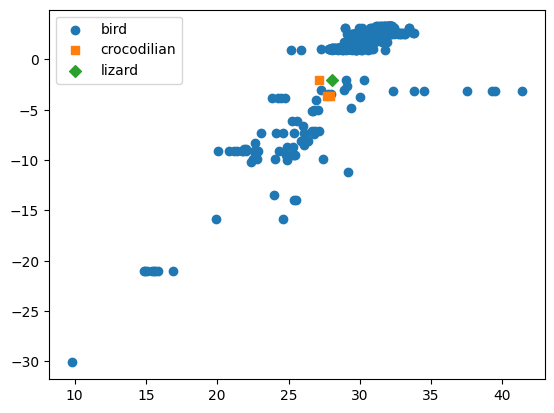

In [ ]:
""" Dataset cleaning """

# Select only extant animals

df_extant = df_select[df_select['Age'] == 'present-day']

# Remove entries with missing values

df_OCisotopes = df_extant.dropna(axis=0, subset=['d18Oc', 'd18Owmoy', 'Animal'])

print(df_OCisotopes)

# Convert V-PDB d18O values to V-SMOW scale

df_OCisotopes.loc[df_OCisotopes['d18OcStd'] == 'V-PDB', 'd18Oc'] = (1.03092 * df_OCisotopes.loc[df_OCisotopes['d18OcStd'] == 'V-PDB', 'd18Oc'] + 30.92)


# Scatter plot of two variables (x, y) and category separator (marker style)

x_axis = 'd18Oc'
y_axis = 'd18Owmoy'
marker_separator = 'Animal'

# df_OCisotopes.plot(kind='scatter', x=x, y=Y, c=None)

# Define a list of markers to cycle through
markers = ['o', 's', 'D', '^', '*', 'x', 'P', 'H']
group_values = df_OCisotopes[marker_separator].unique()

fig, ax = plt.subplots()

for i, Animal in enumerate(group_values):
    marker = markers[i % len(markers)]
    subset = df_OCisotopes[df_OCisotopes[marker_separator] == Animal]
    ax.scatter(subset[x_axis], subset[y_axis], marker=marker, label=f"{Animal}")

ax.legend()
plt.show()